In [1]:
import numpy as np
import ipywidgets as widgets

from filter_design_analysis.analysis import *
from filter_design_analysis.filter import *
from filter_design_analysis.signal import *

## Poles & Zeros

Given the following transfer function: 

$H(z) = \frac{b_0 + b_1z^{-1} + ... + b_Nz^{-N}}{a_0 + a_1z^{-1} + ... + a_Nz^{-N}}$

We can calculate a set of numbers useful for analysis : poles and zeros.

Zeros are defined as solutions to the following equations:

$b_0 + b_1z^{-1} + ... + b_Nz^{-N}=0$

i.e the numerator roots, while poles are defined as solution to the following equations:

$a_0 + a_1z^{-1} + ... + a_Nz^{-N}=0$

i.e the denominator roots.

In the context of filter, poles and zeros have 2 main applications:

- Verifying the stability of the filter
- Designing the filter

### Filter stability

We can use the poles and zeros to verify a filter stability. To do this visually, we can plot them on a graph called the zero-pole plot.
Because both poles and zeros are complex numbers, the zero-pole plot is displayed in a complex plane called the $z$ plane.

A filter is defined as stable if all its poles lie within the unit circle on the zero-pole plot.

#### Example 1: How to plot the following transfer function: $H(z) = {z^{-1}+z^{-2}\over1+{1\over4}z^{-1}-{3\over8}z^{-2}}$

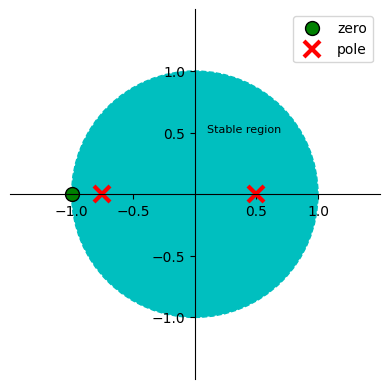

In [2]:
poles, zeros = get_poles_zeros_from_coefs(np.array([0, 1, 1]), np.array([1, 1/4., -3/8.]))
plot_poles_zeros_from_coefs(poles, zeros)

### Designing filters

#### Effect of poles

In [3]:
# 1 conjugate pole pair filter
def design_and_plot_filter_conjugate_pole(pole_amplitude=0.8, pole_angle=0.1):
    zeros = np.array([])
    poles = np.array([pole_amplitude * np.exp(1j*pole_angle), pole_amplitude * np.exp(-1j*pole_angle)])
    k = 1 #- 2*pole_amplitude*np.cos(pole_angle) + pole_amplitude**2 # scale factor to keep gain pass band at 0dB
    plot_filter_response_and_pole_zero(zeros, poles, k)

widgets.interact(design_and_plot_filter_conjugate_pole, pole_amplitude=(0, 1, 0.01), pole_angle=(0, np.pi, 0.1));

interactive(children=(FloatSlider(value=0.8, description='pole_amplitude', max=1.0, step=0.01), FloatSlider(va…

- Complex conjugate pairs of poles to make sure the filter coefficients are real.
- As the pole moves closer to the unit circle the gain enhancement at pole angle ($𝜔_0$) becomes more prominent.
- The amplitude response at a specific value of 𝜔, 𝐻(𝑗𝜔), is found by
measuring the length of the two lines that connect the poles to the point 𝑗𝜔
- Poles implies gain enhancement around $w_0$ 

#### Effect of zeros

In [4]:
# 1 conjugate zero pair filter
def design_and_plot_filter_conjugate_zero(zero_amplitude=0.8, zero_angle=0.1):
    zeros = np.array([zero_amplitude * np.exp(1j*zero_angle), zero_amplitude * np.exp(-1j*zero_angle)])
    poles = np.array([])
    k = 1 / (1 - 2*zero_amplitude*np.cos(zero_angle) + zero_amplitude**2) # scale factor to keep gain pass band at 0dB
    plot_filter_response_and_pole_zero(zeros, poles, k)

widgets.interact(design_and_plot_filter_conjugate_zero, zero_amplitude=(0, 1, 0.01), zero_angle=(0, np.pi, 0.1));

interactive(children=(FloatSlider(value=0.8, description='zero_amplitude', max=1.0, step=0.01), FloatSlider(va…

- As the zero moves closer to the unit circle, the gain suppression at zero angle (𝜔0) becomes more prominent.

#### Effect of number of poles

In [5]:
# N conjugate pole pair filters
def design_and_plot_n_filter_conjugate_poles(number_of_poles=1):
    zeros = np.array([])

    fc = 5000
    pole_angle = (fc * 2 * np.pi) / sample_rate 
    pole_amplitudes = np.linspace(0.01, 0.5, number_of_poles)
    poles = np.concatenate([pole_amplitudes * np.exp(1j*pole_angle), pole_amplitudes * np.exp(-1j*pole_angle)])
    
    # Calculate scale factor to keep gain pass band at 0dB
    k = 1
    for pole_amplitude in pole_amplitudes:
        k = k * (1 - pole_amplitude*np.exp(1j*pole_angle)) * (1 - pole_amplitude*np.exp(-1j*pole_angle))
    
    plot_filter_response_and_pole_zero(zeros, poles, k)

widgets.interact(design_and_plot_n_filter_conjugate_poles, number_of_poles=(1, 10, 1));

interactive(children=(IntSlider(value=1, description='number_of_poles', max=10, min=1), Output()), _dom_classe…

## Frequency response

Another useful response to do filter analysis is the frequency response. At its name suggests, this is the response of the filter over the frequencies. 2 different methods can be use to derive it:

- Impulse response + Fast Fourier Transform
- Evaluating the transfer function directly for all the frequencies

### Impulse response + Fast Fourier Transform

Given an temporal input signal, the FFT gives insight on the amount of energy per frequency bin for this signal. In other words, the FFT gives us a plot of the frequency response of the input signal. Therefore to get the frequency response of a filter, we need to generate a signal that would fully described the filter in the temporal domain. For this, we are using the impulse reponse. Computing the frequency response of a filter then consists of 2 steps:

- Generating the impulse response
- Taking the FFT of the impulse response

In [9]:
# Example 1: Simple filter

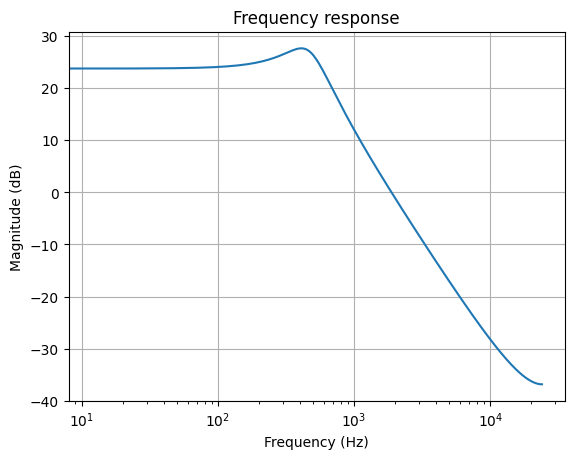

In [9]:
# Exercise 1: mvmfilter's frequency response
Fs = 48000
plot_fft_frequency_response(mvmfilter(440, 0.001, Fs), 4096, Fs)

### Evaluating directly the transfer function

Another way of calculalting the frequency response is by evaluating the transfer function at all different frequencies.
For this recall the generic form of a filter transfer function:

$H(z) = \frac{b_0 + b_1z^{-1} + ... + b_Nz^{-N}}{a_0 + a_1z^{-1} + ... + a_Nz^{-N}}$

and all we need to do is the following substitution: 

$z = e^{j\theta} = e^{jwT}$

where $T$ is the sampling interval in seconds and $w$ the radian frequency

and then calculate the magnitude value of the transfer function for $w$ ranging from 0 to $\pi$

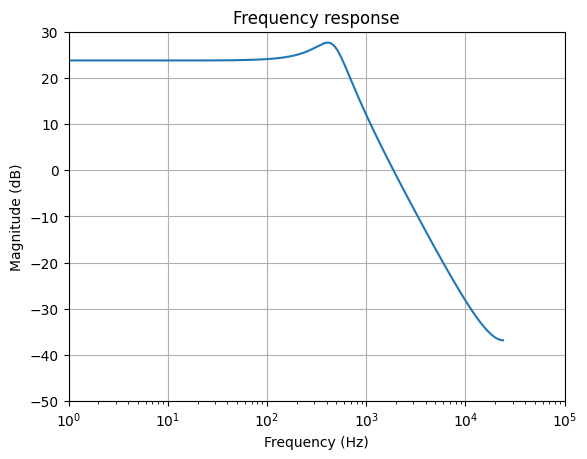

In [8]:
osc = mvmfilter(440, 0.001, 48000)
f, freq_response = get_direct_frequency_response(np.array([0, 0, osc.y1]), np.array([1, -2*osc.x1, osc.x1*osc.x1+osc.y1*osc.y1]), 48000, 1024)
plot_frequency_response(f, freq_response)